In [1]:
import joblib
from skopt.optimizer import gp_minimize
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
import os

import pickle

import numpy as np

In [2]:
np.int = np.int64

In [3]:
# Example search spaces
search_spaces = {
    'n_estimators': Integer(1, 10),
    'max_depth': Integer(1, 100),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'bootstrap': Categorical([True, False]),
}

# Load dataset for demonstration
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Check if a checkpoint exists
checkpoint_file = 'checkpoint.pkl'

In [5]:
# Define the scoring function
def scoring_function(params):
    # TODO: implement Cross-Validation here
    model = RandomForestRegressor(
        n_estimators=params[0],
        max_depth=params[1],
        min_samples_split=params[2],
        min_samples_leaf=params[3],
        bootstrap=params[4]
    )
    model.fit(X_train, y_train)
    return -model.score(X_test, y_test)

In [6]:
# Define a callback function to save the results
def save_checkpoint(res):
    with open(checkpoint_file, 'wb') as f:
        pickle.dump(res, f)

In [7]:
N_CALLS = 100

In [8]:

try:
    with open(checkpoint_file, 'rb') as f:
        res = pickle.load(f)
    print("Resuming from checkpoint.")
except FileNotFoundError:
    res = None
    print("Starting a new optimization.")

# Start or resume the optimization
if res is None:
    res = gp_minimize(
        func=scoring_function,
        dimensions=search_spaces.values(),
        n_initial_points=10,
        n_calls=N_CALLS,
        random_state=42,
        verbose=True,
        callback=save_checkpoint)
else:
    # Use the last point as the starting point for resuming
    last_point = res.x_iters[-1]
    # You might want to adjust the n_calls or other parameters based on the checkpoint
    res = gp_minimize(
        func=scoring_function,
        dimensions=search_spaces.values(),
        n_initial_points=10,
        n_calls=N_CALLS - len(res.x_iters),
        random_state=42,
        verbose=True,
        callback=save_checkpoint,
        x0 = res.x_iters,
        y0 = res.func_vals)

# Save the checkpoint after each iteration or at the end of the optimization
with open(checkpoint_file, 'wb') as f:
    pickle.dump(res, f)

Resuming from checkpoint.
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0010
Function value obtained: -0.7834
Current minimum: -0.8255
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0748
Function value obtained: -0.6730
Current minimum: -0.8255
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0153
Function value obtained: -0.7277
Current minimum: -0.8255
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0148
Function value obtained: -0.5795
Current minimum: -0.8255
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0497
Function value obtained: -0.8191
Current minimum: -0.8255

Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.0446
Function value obtained: -0.7532
Current minimum: -0.8255
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.0409
Function value obtained: -0.6842
Current minimum: -0.8255
Iteration No: 9 started. Evaluating function at random point.
Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.0119
Function value obtained: -0.4538
Current minimum: -0.8255
Iteration No: 10 started. Evaluating function at random point.
Iteration No: 10 ended. Evaluation done at random point.
Time taken: 0.0561
Function value obtained: -0.6549
Current minimum: -0.8255
Iteration No: 11 started. Evaluating function at random point.
Iteration No: 11 ended. Evaluation done at random point.
Time taken: 0.6187
Function value obtained: -0.6727
Current minimum: -0.8255
Iteration No: 12 started. Evaluating function at random point.
Iteration No: 12 end

/home/psaegert/miniconda3/envs/bcnf/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 16 ended. Evaluation done at random point.
Time taken: 0.5574
Function value obtained: -0.8204
Current minimum: -0.8255
Iteration No: 17 started. Evaluating function at random point.
Iteration No: 17 ended. Evaluation done at random point.
Time taken: 0.6873
Function value obtained: -0.7899
Current minimum: -0.8255
Iteration No: 18 started. Evaluating function at random point.
Iteration No: 18 ended. Evaluation done at random point.
Time taken: 0.7329
Function value obtained: -0.7972
Current minimum: -0.8255
Iteration No: 19 started. Evaluating function at random point.
Iteration No: 19 ended. Evaluation done at random point.
Time taken: 0.6737
Function value obtained: -0.8166
Current minimum: -0.8255
Iteration No: 20 started. Evaluating function at random point.
Iteration No: 20 ended. Evaluation done at random point.
Time taken: 0.6327
Function value obtained: -0.7731
Current minimum: -0.8255
Iteration No: 21 started. Evaluating function at random point.
Iteration No: 2

/home/psaegert/miniconda3/envs/bcnf/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 22 ended. Evaluation done at random point.
Time taken: 0.6566
Function value obtained: -0.7914
Current minimum: -0.8255
Iteration No: 23 started. Evaluating function at random point.
Iteration No: 23 ended. Evaluation done at random point.
Time taken: 0.6361
Function value obtained: -0.7432
Current minimum: -0.8255
Iteration No: 24 started. Evaluating function at random point.


/home/psaegert/miniconda3/envs/bcnf/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 24 ended. Evaluation done at random point.
Time taken: 0.7340
Function value obtained: -0.7850
Current minimum: -0.8255
Iteration No: 25 started. Evaluating function at random point.
Iteration No: 25 ended. Evaluation done at random point.
Time taken: 0.7106
Function value obtained: -0.7938
Current minimum: -0.8255
Iteration No: 26 started. Evaluating function at random point.
Iteration No: 26 ended. Evaluation done at random point.
Time taken: 0.6812
Function value obtained: -0.7977
Current minimum: -0.8255
Iteration No: 27 started. Evaluating function at random point.
Iteration No: 27 ended. Evaluation done at random point.
Time taken: 0.6886
Function value obtained: -0.8214
Current minimum: -0.8255
Iteration No: 28 started. Evaluating function at random point.


/home/psaegert/miniconda3/envs/bcnf/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Evaluation done at random point.
Time taken: 0.8286
Function value obtained: -0.7872
Current minimum: -0.8255
Iteration No: 29 started. Evaluating function at random point.
Iteration No: 29 ended. Evaluation done at random point.
Time taken: 0.7449
Function value obtained: -0.7775
Current minimum: -0.8255
Iteration No: 30 started. Evaluating function at random point.
Iteration No: 30 ended. Evaluation done at random point.
Time taken: 0.9196
Function value obtained: -0.7860
Current minimum: -0.8255
Iteration No: 31 started. Evaluating function at random point.
Iteration No: 31 ended. Evaluation done at random point.
Time taken: 0.8739
Function value obtained: -0.8100
Current minimum: -0.8255
Iteration No: 32 started. Evaluating function at random point.
Iteration No: 32 ended. Evaluation done at random point.
Time taken: 0.8356
Function value obtained: -0.8248
Current minimum: -0.8255
Iteration No: 33 started. Evaluating function at random point.
Iteration No: 3

/home/psaegert/miniconda3/envs/bcnf/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 36 ended. Evaluation done at random point.
Time taken: 0.8417
Function value obtained: -0.7955
Current minimum: -0.8291
Iteration No: 37 started. Evaluating function at random point.
Iteration No: 37 ended. Evaluation done at random point.
Time taken: 0.6978
Function value obtained: -0.7111
Current minimum: -0.8291
Iteration No: 38 ended. Evaluation done at random point.
Time taken: 1.4980
Function value obtained: -0.7779
Current minimum: -0.8291


In [11]:
import matplotlib.pyplot as plt

In [13]:
# Save the checkpoint after each iteration or at the end of the optimization
with open(checkpoint_file, 'wb') as f:
    pickle.dump(res, f)

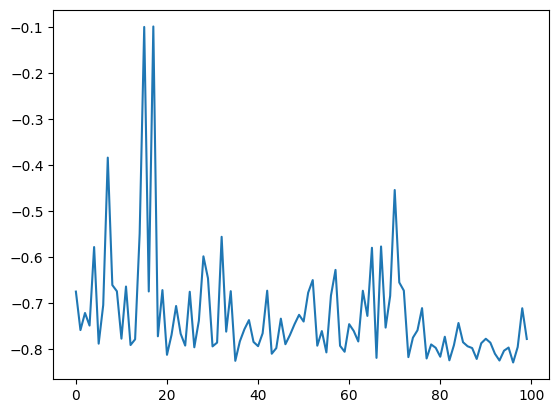

In [14]:
plt.plot(res.func_vals)